<img src="http://drive.google.com/uc?export=view&id=1tpOCamr9aWz817atPnyXus8w5gJ3mIts" width=500px>

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# <font color='blue'> Table Of Contents </font>

## <font color='blue'> Use Case 1: Microservices </font>

## <font color='blue'> Use Case 2: Batch Jobs </font>

# <font color='blue'>Use Case 1: Microservices</font>

Microservices are built with a software architectural method that decomposes complex applications into smaller, independent services. Containers are optimal for running small, decoupled services, and they offer the following advantages:

* Containers make services easy to model in an immutable image with all of your dependencies.

* Containers can use any application and any programming language.

* The container image is a versioned artifact, so you can track your container images to the source they came from.

* You can test your containers locally, and deploy the same artifact to scale.

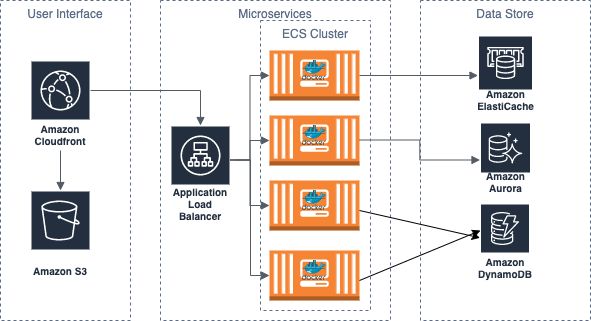
## <font color='blue'>Auto Scaling</font>

The application load for your microservice architecture can change over time. A responsive application can scale out or in, depending on actual or anticipated load. Amazon ECS provides you with several tools to scale not only your services that are running in your clusters, but the actual clusters themselves.

For example, Amazon ECS provides CloudWatch metrics for your clusters and services. You can monitor the memory and CPU utilization for your clusters and services. Then, use those metrics to trigger CloudWatch alarms that can automatically scale out your cluster when its resources are running low. Scale them back in when you don't need as many resources.

In addition to scaling your cluster size, your Amazon ECS service can optionally be configured to use Service Auto Scaling to adjust its desired count up or down in response to CloudWatch alarms. Service Auto Scaling is available in all regions that support Amazon ECS.

## <font color='blue'>Continuous Integration and Continuous Deployment</font>

Continuous integration and continuous deployment (CICD) is a common process for microservice architectures that are based on Docker containers. You can create a pipeline that takes the following actions:

* Monitors changes to a source code repository

* Builds a new Docker image from that source

* Pushes the image to an image repository such as Amazon ECR or Docker Hub

* Updates your Amazon ECS services to use the new image in your application

# <font color='blue'> Use Case 2: Batch Jobs </font>

Docker containers are particularly suited for batch job workloads. Batch jobs are often short-lived and embarrassingly parallel. You can package your batch processing application into a Docker image so that you can deploy it anywhere, such as in an Amazon ECS task.

This reference architecture shows how to handle Batch Processing using Amazon ECS. You may also want to consider AWS Batch, a service that dynamically provisions the optimal quantity and type of compute resources based on the volume and specific resource requirements of the batch jobs submitted. The Batch Processing reference architecture diagram below illustrates the architecture.

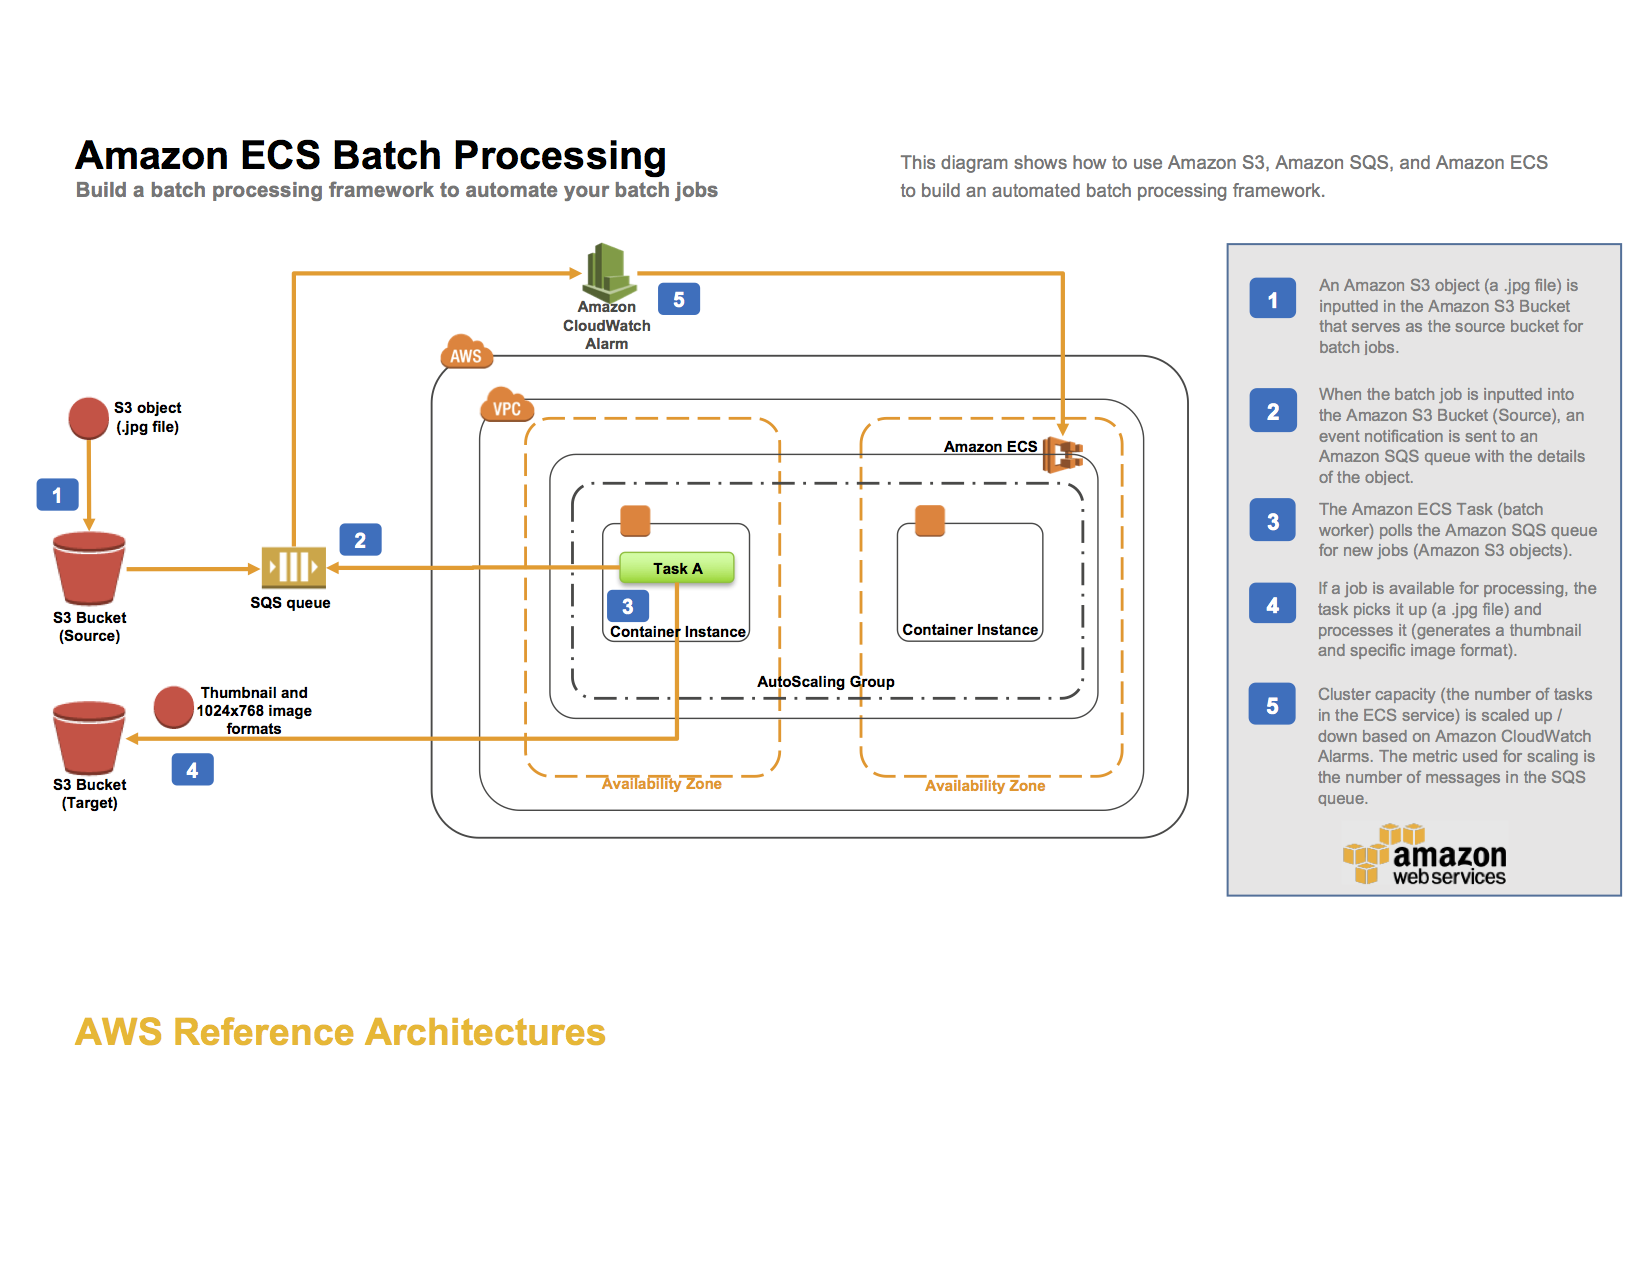

The above architecture creates an input and an output Amazon S3 bucket, an Amazon SQS queue, an Amazon CloudWatch alarm, an ECS cluster, and an ECS task definition. Objects uploaded to the input S3 bucket trigger an event that sends object details to the SQS queue. The ECS task deploys a Docker container that reads from that queue, parses the message containing the object name and then downloads the object. Once transformed it will upload the objects to the S3 output bucket. This example uses images, in jpg format, to showcase the batch processing architecture. Upload images with a .jpg suffix to the input S3 bucket to trigger the event. NOTE: Use the lowercase .jpg suffix.

By using the SQS queue as the location for all object details, we can take advantage of it's scalability and reliability as the queue will automatically scale based on the incoming messages and message retention can be configured. The ECS Cluster will then be able to scale services up or down based on the number of messages in the queue.